In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [57]:
conn= sqlite3.connect('Data\FPA_FOD_20221014.sqlite')

In [58]:
# checking sqlite file structure to find out information table we want is "fires"
show_tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(show_tables_query, conn)
tables

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,views_geometry_columns
5,virts_geometry_columns
6,geometry_columns_statistics
7,views_geometry_columns_statistics
8,virts_geometry_columns_statistics
9,geometry_columns_field_infos


In [59]:
# preview all columns from the fires table to see what data will be applicable for visualizations
query="""
SELECT * FROM Fires
"""
df=pd.read_sql_query(query,conn)

In [60]:
# explore all cols of the fire table
df.columns

Index(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [61]:
#after an overview I would only like the columns pertaing to :  'STATE' 'COUNTY' 'FIRE_NAME''FIRE_YEAR' 'FIRE_SIZE'  'DISCOVERY_DATE' 'CONT_DATE' 'NWCG_GENERAL_CAUSE' 'LATITUDE', 'LONGITUDE' 
query= """SELECT STATE, COUNTY, FIRE_NAME,FIRE_YEAR, FIRE_SIZE, DISCOVERY_DATE, CONT_DATE, NWCG_GENERAL_CAUSE, LATITUDE, LONGITUDE FROM 'Fires' """
df=pd.read_sql_query(query,conn)
df.head()

,STATE,COUNTY,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE
0,CA,63,FOUNTAIN,2005,0.10,2/2/2005,2/2/2005,Power generation/transmission/distribution,40.036944,-121.005833
1,CA,61,PIGEON,2004,0.25,5/12/2004,5/12/2004,Natural,38.933056,-120.404444
2,CA,17,SLACK,2004,0.10,5/31/2004,5/31/2004,Debris and open burning,38.984167,-120.735556
3,CA,3,DEER,2004,0.10,6/28/2004,7/3/2004,Natural,38.559167,-119.913333
4,CA,3,STEVENOT,2004,0.10,6/28/2004,7/3/2004,Natural,38.559167,-119.933056


# EDA

In [62]:
df.isnull().sum()

STATE                      0
COUNTY                665779
FIRE_NAME             964444
FIRE_YEAR                  0
FIRE_SIZE                  0
DISCOVERY_DATE             0
CONT_DATE             894813
NWCG_GENERAL_CAUSE         0
LATITUDE                   0
LONGITUDE                  0
dtype: int64

In [63]:
df.duplicated().value_counts()

False    2301274
True        2292
dtype: int64

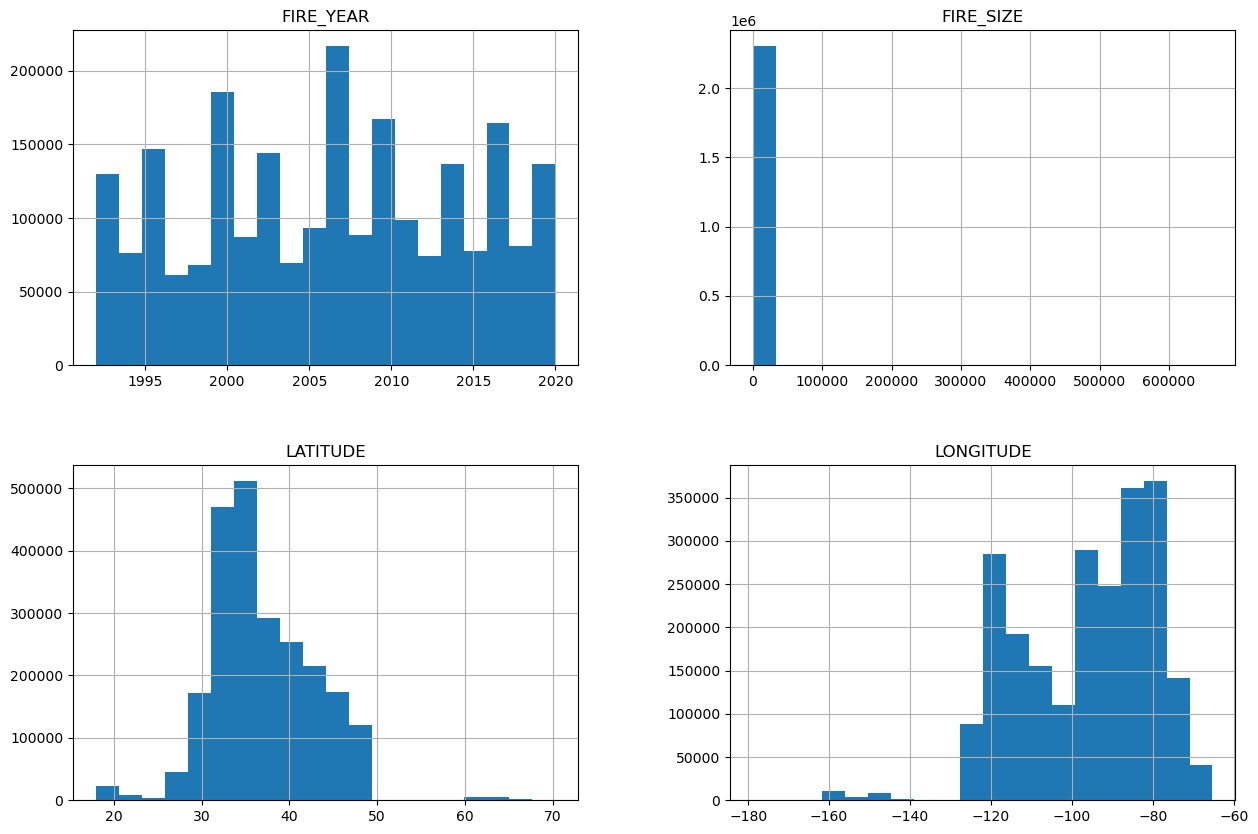

In [64]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.show()

C:\Users\clove\AppData\Local\Temp\ipykernel_21944\2643935987.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


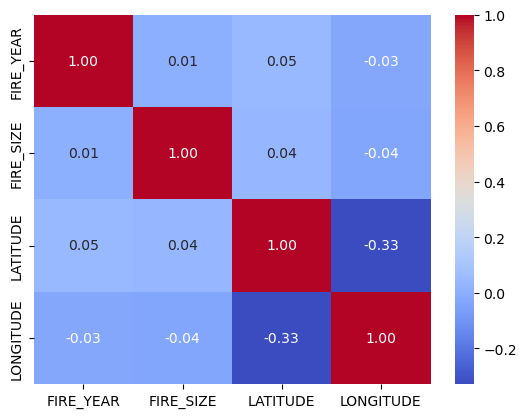

In [65]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

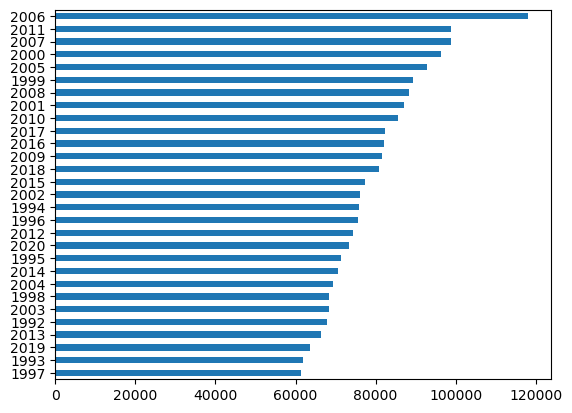

In [66]:
import matplotlib.pyplot as plt

df['FIRE_YEAR'].value_counts().sort_values().plot(kind='barh')
plt.show()

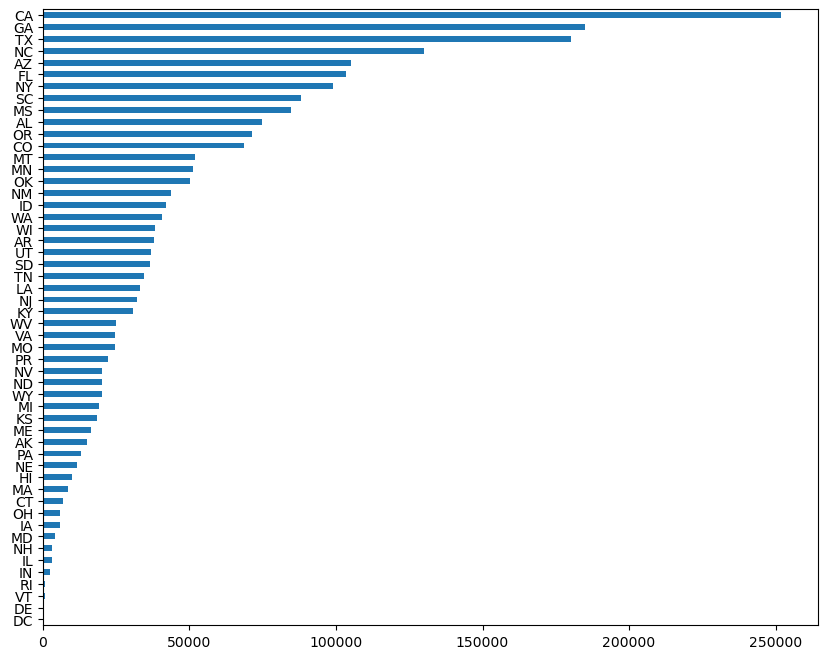

In [67]:

plt.figure(figsize=(10, 8))
df['STATE'].value_counts().sort_values().plot(kind='barh')
plt.show()

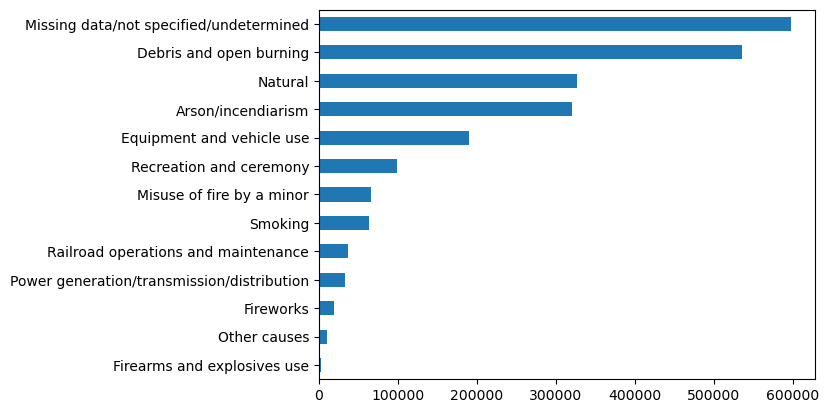

In [68]:
df['NWCG_GENERAL_CAUSE'].value_counts().sort_values().plot(kind='barh')
plt.show()

## Machine Learning.

In [69]:
# prepare DF for machine leaning by encoding all categorical to numeric for machine learning.
for col in df.columns:
    # Check if the column has non-numeric data
    if df[col].dtype == 'object':
        # Use LabelEncoder for categorical data
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col].astype(str))
    elif df[col].dtype == 'bool':
        # Convert boolean values to numeric
        df[col] = df[col].astype(int)

In [70]:
df.head()

,STATE,COUNTY,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE
0,4,211,270833,2005,0.10,3899,3900,9,40.036944,-121.005833
1,4,209,542509,2004,0.25,6255,6258,7,38.933056,-120.404444
2,4,110,608106,2004,0.10,6864,6867,1,38.984167,-120.735556
3,4,163,226019,2004,0.10,7647,8578,7,38.559167,-119.913333
4,4,163,626262,2004,0.10,7647,8578,7,38.559167,-119.933056


In [71]:
#test train split
#from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
X = df.drop(['NWCG_GENERAL_CAUSE'],axis=1).values
y = df['NWCG_GENERAL_CAUSE'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.4925541594604544


In [73]:
df.isna().sum(0)

STATE                 0
COUNTY                0
FIRE_NAME             0
FIRE_YEAR             0
FIRE_SIZE             0
DISCOVERY_DATE        0
CONT_DATE             0
NWCG_GENERAL_CAUSE    0
LATITUDE              0
LONGITUDE             0
dtype: int64

In [74]:
df2=df.dropna()

In [75]:
df2.isnull().sum()

STATE                 0
COUNTY                0
FIRE_NAME             0
FIRE_YEAR             0
FIRE_SIZE             0
DISCOVERY_DATE        0
CONT_DATE             0
NWCG_GENERAL_CAUSE    0
LATITUDE              0
LONGITUDE             0
dtype: int64

In [76]:
df2.isna().sum(0)

STATE                 0
COUNTY                0
FIRE_NAME             0
FIRE_YEAR             0
FIRE_SIZE             0
DISCOVERY_DATE        0
CONT_DATE             0
NWCG_GENERAL_CAUSE    0
LATITUDE              0
LONGITUDE             0
dtype: int64

In [77]:
X = df2.drop(['NWCG_GENERAL_CAUSE'],axis=1).values
y = df2['NWCG_GENERAL_CAUSE'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4925541594604544


In [78]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Hyperparameters: {accuracy}')


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy with Best Hyperparameters: 0.5571322400727914
